In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Flight price List.csv")

In [3]:
df

,Unnamed: 0,Airline,Flight Number,Date of Departure,From,To,Duration,Total Stops,Price
0,0,Air Asia,I5-764,"Tue, Feb 8",New Delhi,Mumbai,2h 10m,Non Stop,"2,456"
1,1,IndiGo,6E-2054,"Tue, Feb 8",New Delhi,Mumbai,2h 10m,Non Stop,"2,456"
2,2,IndiGo,6E-5001,"Tue, Feb 8",New Delhi,Mumbai,2h 10m,Non Stop,"2,456"
3,3,IndiGo,6E-2046,"Tue, Feb 8",New Delhi,Mumbai,2h 10m,Non Stop,"2,456"
4,4,IndiGo,6E-5328,"Tue, Feb 8",New Delhi,Mumbai,2h 15m,Non Stop,"2,456"
...,...,...,...,...,...,...,...,...,...
2580,2580,Vistara,UK-613,Dec-07,Mumbai,Bangalore,08h 10m,2+-stop,"15,581"
2581,2581,Vistara,UK-653,Dec-07,Mumbai,Bangalore,12h 15m,1-stop,"15,603"
2582,2582,Air India,AI-675,Dec-07,Mumbai,Bangalore,17h 10m,1-stop,"15,498"
2583,2583,Vistara,UK-651,Dec-07,Mumbai,Bangalore,26h 10m,1-stop,"17,283"


In [4]:
df.shape

(2585, 9)

In [5]:
#checking for null values

df.isnull().sum()

Unnamed: 0           0
Airline              0
Flight Number        0
Date of Departure    0
From                 0
To                   0
Duration             0
Total Stops          0
Price                0
dtype: int64

In [6]:
#Checking for blank spaces, random characters in each column

search =[" ","-",]

for c in df:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((df[c] == s).sum())

  in Unnamed: 0 =  0
- in Unnamed: 0 =  0
  in Airline =  0
- in Airline =  0
  in Flight Number =  0
- in Flight Number =  0
  in Date of Departure =  0
- in Date of Departure =  0
  in From =  0
- in From =  0
  in To =  0
- in To =  0
  in Duration =  0
- in Duration =  0
  in Total Stops =  0
- in Total Stops =  0
  in Price =  0
- in Price =  0


In [7]:
df.nunique()

Unnamed: 0           2585
Airline                10
Flight Number        1304
Date of Departure      47
From                   26
To                     27
Duration              442
Total Stops             7
Price                 833
dtype: int64

In [8]:
#Data Cleaning

df['Total Stops'].value_counts()

1-stop       1051
1 Stop        585
Non Stop      583
non-stop      271
2+-stop        88
2 Stop(s)       6
3 Stop(s)       1
Name: Total Stops, dtype: int64

In [9]:
df['Total Stops'] = df['Total Stops'].replace({'1 Stop':'1-stop','Non Stop':'non-stop','3 Stop(s)':'2+-stop'})

In [10]:
df['Total Stops'].value_counts()

1-stop       1636
non-stop      854
2+-stop        89
2 Stop(s)       6
Name: Total Stops, dtype: int64

In [11]:
df['Airline'].value_counts()

IndiGo       609
Air India    496
Vistara      410
Indigo       308
GO FIRST     208
SpiceJet     200
AirAsia      127
Air Asia     122
Go First     100
TruJet         5
Name: Airline, dtype: int64

In [12]:
df['Airline'] = df['Airline'].replace({'Indigo':'IndiGo','AirAsia':'Air Asia','GO FIRST':'Go First'})

In [13]:
df['Airline'].value_counts()

IndiGo       917
Air India    496
Vistara      410
Go First     308
Air Asia     249
SpiceJet     200
TruJet         5
Name: Airline, dtype: int64

In [14]:
df['From'].value_counts()

Delhi          769
Mumbai         618
Kolkata        313
New Delhi      240
Bangalore      150
Hyderabad      139
Goa             60
Chennai         40
Patna           30
Port Blair      30
Dehradun        20
Imphal          20
Lucknow         20
Guwahati        20
Varanasi        10
Jaipur          10
Pune            10
Srinagar        10
Vijayawada      10
Chandigarh      10
Indore          10
Ahmedabad       10
Coimbatore      10
Tirupati        10
Rajahmundry      9
Kochi            7
Name: From, dtype: int64

In [15]:
df['From'] = df['From'].replace({'Delhi':'New Delhi'})

In [16]:
df['From'].value_counts()

New Delhi      1009
Mumbai          618
Kolkata         313
Bangalore       150
Hyderabad       139
Goa              60
Chennai          40
Patna            30
Port Blair       30
Dehradun         20
Imphal           20
Lucknow          20
Guwahati         20
Varanasi         10
Jaipur           10
Pune             10
Srinagar         10
Vijayawada       10
Chandigarh       10
Indore           10
Ahmedabad        10
Coimbatore       10
Tirupati         10
Rajahmundry       9
Kochi             7
Name: From, dtype: int64

In [17]:
df['To'].value_counts()

Bangalore      516
Delhi          361
Goa            321
Kolkata        314
Mumbai         282
New Delhi      220
Hyderabad      139
Pune            81
Patna           72
Chennai         40
Port Blair      30
Dehradun        20
Guwahati        20
Jammu           20
Imphal          20
Lucknow         19
Rajahmundry     10
Coimbatore      10
Srinagar        10
Tirupati        10
Kochi           10
Jaipur          10
Vijayawada      10
Chandigarh      10
Indore          10
Ahmedabad       10
Varanasi        10
Name: To, dtype: int64

In [18]:
df['To'] = df['To'].replace({'Delhi':'New Delhi'})

In [19]:
df['To'].value_counts()

New Delhi      581
Bangalore      516
Goa            321
Kolkata        314
Mumbai         282
Hyderabad      139
Pune            81
Patna           72
Chennai         40
Port Blair      30
Dehradun        20
Imphal          20
Guwahati        20
Jammu           20
Lucknow         19
Varanasi        10
Jaipur          10
Vijayawada      10
Kochi           10
Rajahmundry     10
Srinagar        10
Chandigarh      10
Indore          10
Ahmedabad       10
Coimbatore      10
Tirupati        10
Name: To, dtype: int64

In [20]:
df['Date of Departure'].value_counts()

Dec-01         694
Dec-07         184
Dec-04         164
Dec-06         163
Thu, Feb 24    140
Dec-02          92
Tue, Jan 4      90
Dec-05          71
Wed, Jan 5      70
Tue, Jan 18     70
Mon, Jan 24     60
Mon, Feb 14     50
Wed, Jan 12     50
Tue, Dec 28     50
Dec-03          42
Mon, Dec 27     40
Mon, Jan 17     40
Sat, Feb 26     40
Tue, Jan 11     30
Thu, Dec 30     30
Tue, Feb 1      30
Tue, Feb 8      30
Fri, Jan 14     30
Fri, Jan 7      30
Mon, Feb 7      30
Wed, Jan 19     20
Fri, Dec 31     20
Sun, Dec 26     20
Thu, Jan 6      20
Fri, Feb 25     20
Sat, Jan 15     10
Wed, Dec 22     10
Fri, Dec 17     10
Sat, Dec 11     10
Wed, Feb 23     10
Thu, Feb 17     10
Sat, Jan 1      10
Sat, Dec 25     10
Sun, Feb 20     10
Thu, Jan 20     10
Wed, Feb 2      10
Sun, Jan 23     10
Sun, Jan 2      10
Thu, Jan 27     10
Mon, Jan 10     10
Wed, Dec 29     10
Thu, Dec 2       5
Name: Date of Departure, dtype: int64

In [21]:
df['Date of Departure'] = df['Date of Departure'].replace({'Dec 02':'Thu, Dec 2','Dec 01':'Wed, Dec 1','Dec 03':'Fri, Dec 3','Dec 04':'Sat, Dec 4','Dec 05':'Sun, Dec 5','Dec 06':'Mon, Dec 6','Dec 07':'Tue, Dec 7'})


In [22]:
df['Date of Departure'].value_counts()

Dec-01         694
Dec-07         184
Dec-04         164
Dec-06         163
Thu, Feb 24    140
Dec-02          92
Tue, Jan 4      90
Dec-05          71
Wed, Jan 5      70
Tue, Jan 18     70
Mon, Jan 24     60
Mon, Feb 14     50
Wed, Jan 12     50
Tue, Dec 28     50
Dec-03          42
Mon, Dec 27     40
Mon, Jan 17     40
Sat, Feb 26     40
Tue, Jan 11     30
Thu, Dec 30     30
Tue, Feb 1      30
Tue, Feb 8      30
Fri, Jan 14     30
Fri, Jan 7      30
Mon, Feb 7      30
Wed, Jan 19     20
Fri, Dec 31     20
Sun, Dec 26     20
Thu, Jan 6      20
Fri, Feb 25     20
Sat, Jan 15     10
Wed, Dec 22     10
Fri, Dec 17     10
Sat, Dec 11     10
Wed, Feb 23     10
Thu, Feb 17     10
Sat, Jan 1      10
Sat, Dec 25     10
Sun, Feb 20     10
Thu, Jan 20     10
Wed, Feb 2      10
Sun, Jan 23     10
Sun, Jan 2      10
Thu, Jan 27     10
Mon, Jan 10     10
Wed, Dec 29     10
Thu, Dec 2       5
Name: Date of Departure, dtype: int64

In [23]:
#Converting values in Column 'Price' to int64 datatype


price = df['Price'].tolist()

In [24]:
Price = []
for p in price:
    Price.append(p.replace(",",""))

In [25]:
dx = pd.DataFrame({'Price':Price})

In [26]:
dx.index = dx.index

In [27]:
df['Price'] = dx['Price']

In [28]:
df['Price'] = df['Price'].astype('int64')

In [32]:
#Dropping column Unnamed: 0 since it is not required for building the predictive model

df.drop(columns=['Unnamed: 0'],inplace = True) 

In [33]:
df.reset_index(drop=True,inplace = True)

In [36]:
#Feature Engineering

DateDept = df['Date of Departure'].tolist() 


In [37]:
Day=[]
date = []
Month = []
Date = []

In [40]:
df['Duration']

0        2h 10m
1        2h 10m
2        2h 10m
3        2h 10m
4        2h 15m
         ...   
2580    08h 10m
2581    12h 15m
2582    17h 10m
2583    26h 10m
2584    08h 30m
Name: Duration, Length: 2585, dtype: object

In [41]:
duration = df['Duration'].tolist() #creating a list with values from colum 'Duration'

In [42]:
duration

['2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 15m',
 '2h 15m',
 '2h 20m',
 '2h 20m',
 '2h 25m',
 '2h 25m',
 '2h 45m',
 '2h 50m',
 '2h 50m',
 '2h 55m',
 '2h 45m',
 '2h 50m',
 '2h 50m',
 '2h 55m',
 '2h 55m',
 '3h 00m',
 '9h 45m',
 '10h 45m',
 '5h 15m',
 '17h 40m',
 '18h 40m',
 '14h 25m',
 '6h 40m',
 '4h 35m',
 '7h 35m',
 '9h 50m',
 '14h 55m',
 '26h 45m',
 '7h 45m',
 '2h 45m',
 '13h 00m',
 '17h 10m',
 '26h 15m',
 '22h 40m',
 '2h 40m',
 '2h 50m',
 '2h 20m',
 '2h 05m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 15m',
 '2h 15m',
 '2h 15m',
 '2h 15m',
 '2h 15m',
 '11h 35m',
 '16h 00m',
 '22h 25m',
 '26h 10m',
 '14h 45m',
 '19h 10m',
 '25h 35m',
 '20h 45m',
 '11h 45m',
 '19h 50m',
 '5h 50m',
 '5h 25m',
 '2h 05m',
 '10h 30m',
 '2h 10m',
 '2h 25m',
 '2h 40m',
 '5h 00m',
 '6h 00m',
 '7h 20m',
 '1h 30m',
 '1h 35m',
 '1h 35m',
 '1h 35m',
 '1h 35m',
 '1h 40m',
 '1h 40m',
 '1h 45m',
 '1h 45m',
 '9h 25m',
 '30h 30m',
 '15h 30m',
 '23h 35m',
 '21h 35m',
 '5h 00m',
 '9h 30m',
 '10h 55m',
 '4h 25m',
 '18h 

In [43]:
""" replacing 'h' with *60, whitespace with "+",removing "m" and 
removing leading zeroes from the decimal integer literals since they aren't allowed in python """

for i in range(0,len(duration)):
    duration[i] = duration[i].replace("h","*60").replace("00","0").replace("01","1").replace("02","2").replace("03","3").replace("04","4").replace("05","5").replace("06","6").replace("07","7").replace("08","8").replace("09","9").replace(" ","+").replace("m","").replace("1.0*60+","1*60") 
duration

['2*60+10',
 '2*60+10',
 '2*60+10',
 '2*60+10',
 '2*60+15',
 '2*60+15',
 '2*60+20',
 '2*60+20',
 '2*60+25',
 '2*60+25',
 '2*60+45',
 '2*60+50',
 '2*60+50',
 '2*60+55',
 '2*60+45',
 '2*60+50',
 '2*60+50',
 '2*60+55',
 '2*60+55',
 '3*60+0',
 '9*60+45',
 '10*60+45',
 '5*60+15',
 '17*60+40',
 '18*60+40',
 '14*60+25',
 '6*60+40',
 '4*60+35',
 '7*60+35',
 '9*60+50',
 '14*60+55',
 '26*60+45',
 '7*60+45',
 '2*60+45',
 '13*60+0',
 '17*60+10',
 '26*60+15',
 '22*60+40',
 '2*60+40',
 '2*60+50',
 '2*60+20',
 '2*60+5',
 '2*60+10',
 '2*60+10',
 '2*60+10',
 '2*60+15',
 '2*60+15',
 '2*60+15',
 '2*60+15',
 '2*60+15',
 '11*60+35',
 '16*60+0',
 '22*60+25',
 '26*60+10',
 '14*60+45',
 '19*60+10',
 '25*60+35',
 '20*60+45',
 '11*60+45',
 '19*60+50',
 '5*60+50',
 '5*60+25',
 '2*60+5',
 '10*60+30',
 '2*60+10',
 '2*60+25',
 '2*60+40',
 '5*60+0',
 '6*60+0',
 '7*60+20',
 '1*60+30',
 '1*60+35',
 '1*60+35',
 '1*60+35',
 '1*60+35',
 '1*60+40',
 '1*60+40',
 '1*60+45',
 '1*60+45',
 '9*60+25',
 '30*60+30',
 '15*60+30',


In [44]:
for i in range(0,len(duration)):
    duration[i] = eval(duration[i])

In [45]:
len(duration)

2585

In [48]:
#Adding Duration(mins) column to df dataframe.

dur_df = pd.DataFrame({"Duration(mins)":duration})

In [49]:
dur_df.index = df.index

In [50]:
df['Duration(mins)'] = dur_df['Duration(mins)']

In [51]:
df

,Airline,Flight Number,Date of Departure,From,To,Duration,Total Stops,Price,Duration(mins)
0,Air Asia,I5-764,"Tue, Feb 8",New Delhi,Mumbai,2h 10m,non-stop,2456,130
1,IndiGo,6E-2054,"Tue, Feb 8",New Delhi,Mumbai,2h 10m,non-stop,2456,130
2,IndiGo,6E-5001,"Tue, Feb 8",New Delhi,Mumbai,2h 10m,non-stop,2456,130
3,IndiGo,6E-2046,"Tue, Feb 8",New Delhi,Mumbai,2h 10m,non-stop,2456,130
4,IndiGo,6E-5328,"Tue, Feb 8",New Delhi,Mumbai,2h 15m,non-stop,2456,135
...,...,...,...,...,...,...,...,...,...
2580,Vistara,UK-613,Dec-07,Mumbai,Bangalore,08h 10m,2+-stop,15581,490
2581,Vistara,UK-653,Dec-07,Mumbai,Bangalore,12h 15m,1-stop,15603,735
2582,Air India,AI-675,Dec-07,Mumbai,Bangalore,17h 10m,1-stop,15498,1030
2583,Vistara,UK-651,Dec-07,Mumbai,Bangalore,26h 10m,1-stop,17283,1570


In [52]:
df.drop(columns = ['Duration'],inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2585 entries, 0 to 2584
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            2585 non-null   object
 1   Flight Number      2585 non-null   object
 2   Date of Departure  2585 non-null   object
 3   From               2585 non-null   object
 4   To                 2585 non-null   object
 5   Total Stops        2585 non-null   object
 6   Price              2585 non-null   int64 
 7   Duration(mins)     2585 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 161.7+ KB


<AxesSubplot:xlabel='Price', ylabel='Density'>

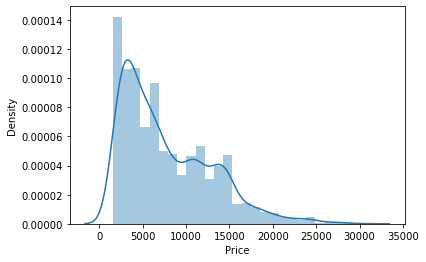

In [56]:
#Interpreting Relationship between Independent and Dependent Variables
sns.distplot(df.Price)

In [57]:
df.Price.skew()

1.0172820592622136

In [58]:
#Analyzing the Feature Columns

df.dtypes[df.dtypes == 'object'] #Identifying the Categorical Columns

Airline              object
Flight Number        object
Date of Departure    object
From                 object
To                   object
Total Stops          object
dtype: object

In [59]:
df['Airline'].value_counts()

IndiGo       917
Air India    496
Vistara      410
Go First     308
Air Asia     249
SpiceJet     200
TruJet         5
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='count'>

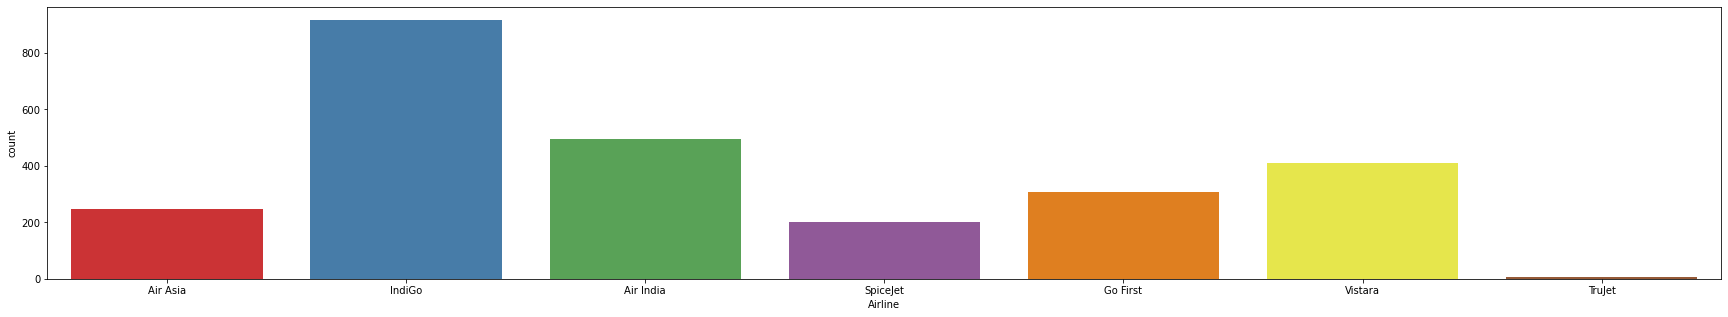

In [60]:
plt.figure(figsize=(30,5),facecolor='white')
sns.countplot(df['Airline'], palette="Set1")

<AxesSubplot:xlabel='count', ylabel='From'>

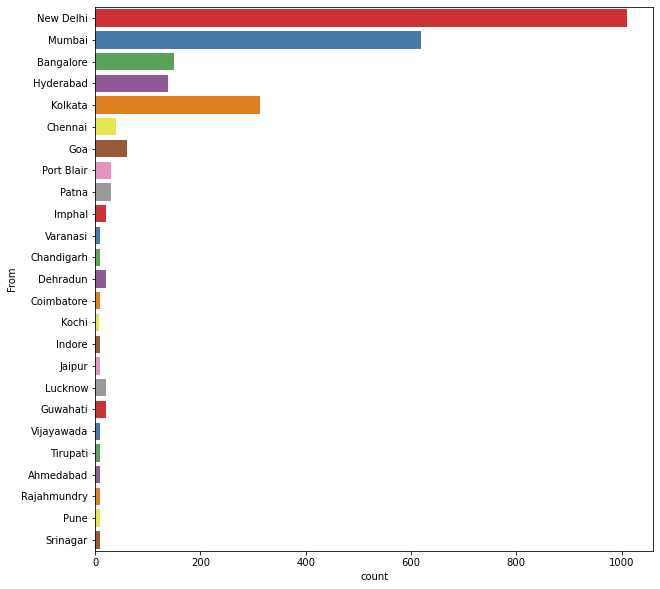

In [61]:
plt.figure(figsize=(10,10),facecolor='white')
sns.countplot(y=df['From'], palette="Set1")

<AxesSubplot:xlabel='count', ylabel='To'>

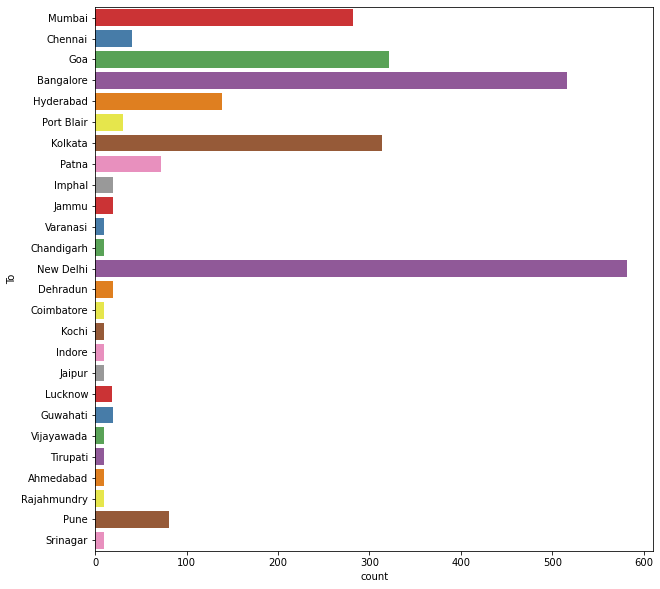

In [62]:
plt.figure(figsize=(10,10),facecolor='white')
sns.countplot(y=df['To'], palette="Set1")

<AxesSubplot:xlabel='Total Stops', ylabel='count'>

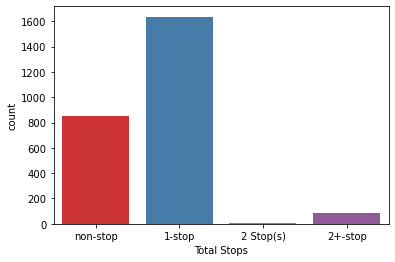

In [63]:
sns.countplot(df['Total Stops'], palette="Set1")

Text(0.5, 1.0, 'Price Trend')

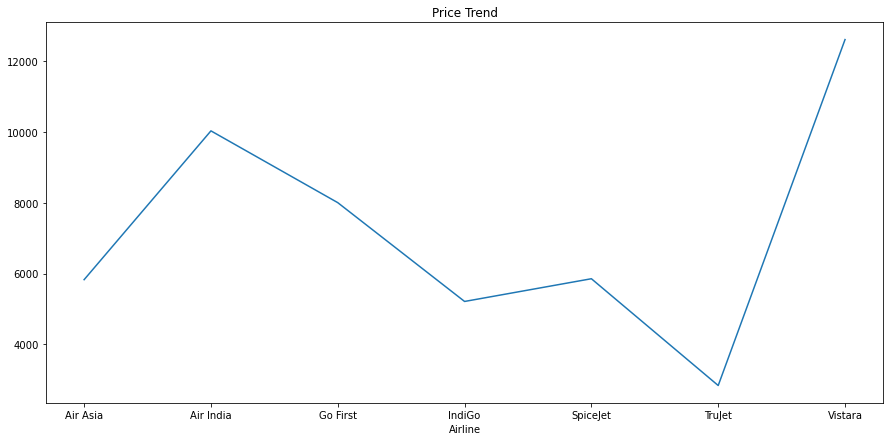

In [66]:
#Analyzing Relationship between Airlines and Price

fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Airline']).mean()['Price'].plot(ax=ax)
plt.title('Price Trend')

Text(0.5, 1.0, 'Price Trend')

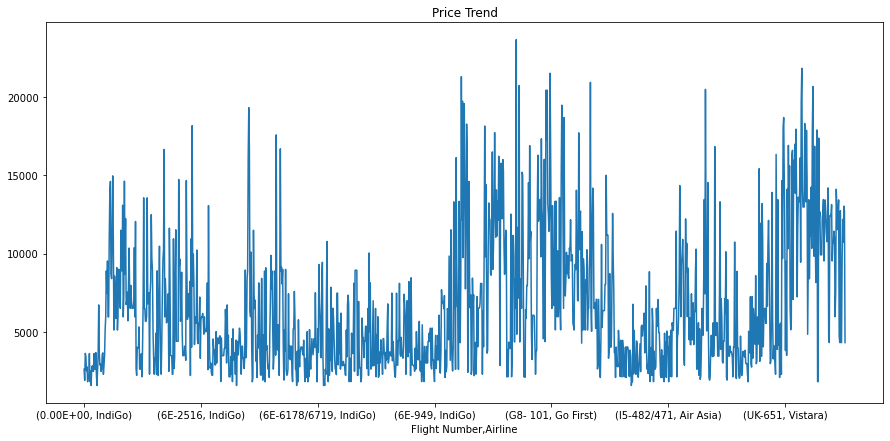

In [67]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Flight Number','Airline'])['Price'].mean().plot(ax=ax)
plt.title('Price Trend')

# Flight numbers vs Price

Text(0.5, 1.0, 'Price Trend')

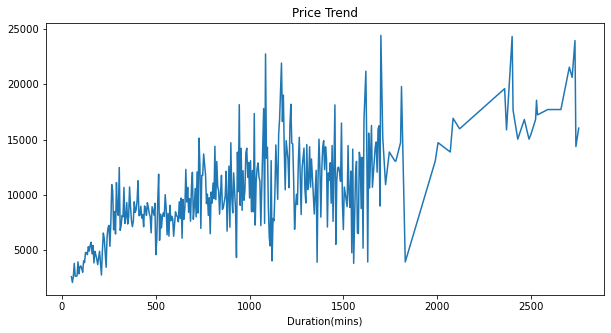

In [68]:
plt.figure(figsize=(10,5))
df.groupby('Duration(mins)')['Price'].mean().plot()
plt.title('Price Trend')

Text(0.5, 1.0, 'Duration vs Stops')

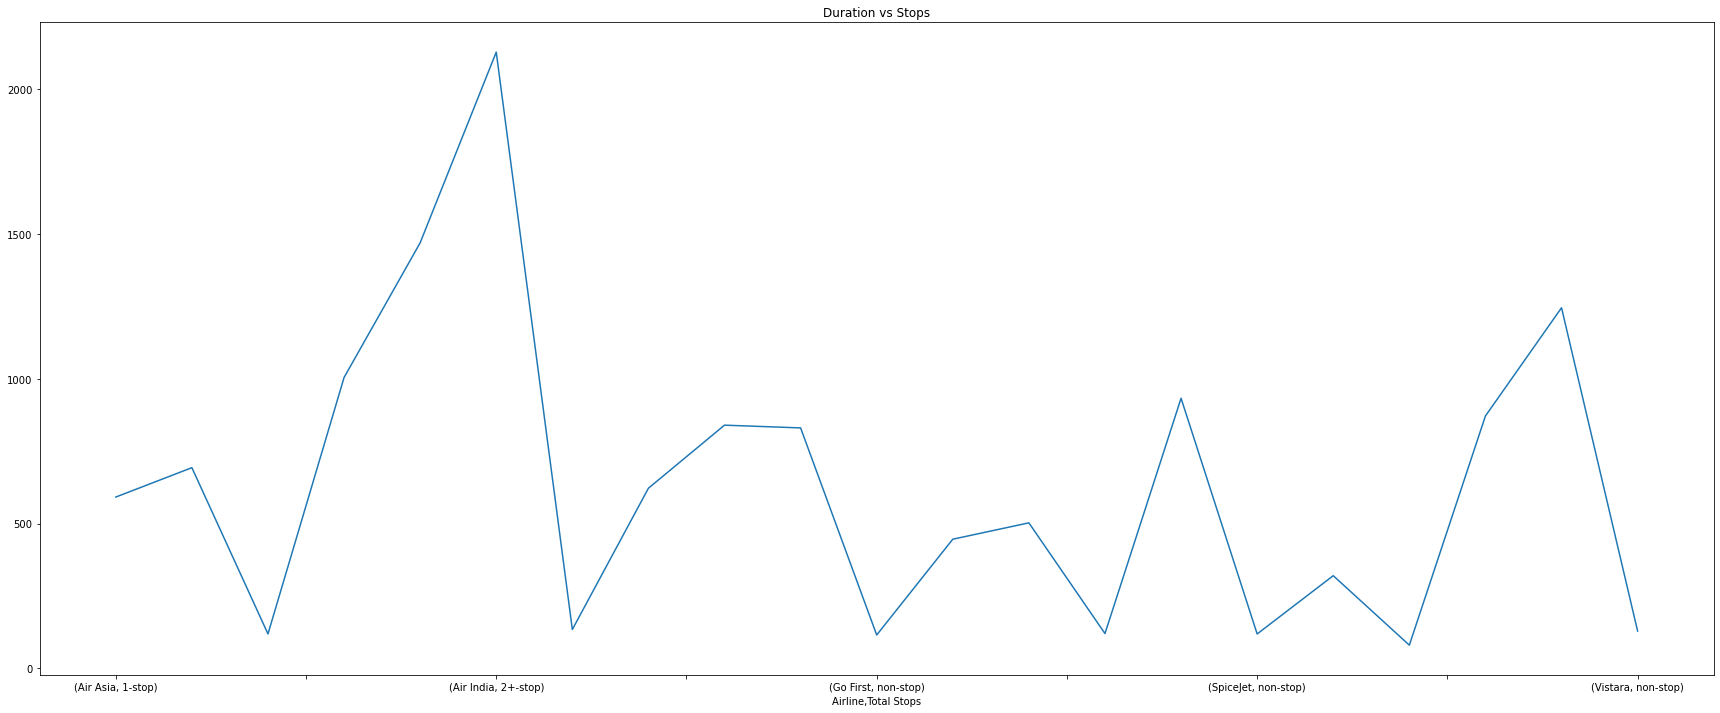

In [69]:
plt.figure(figsize=(30,12))
df.groupby(['Airline','Total Stops'])['Duration(mins)'].mean().plot()
plt.title('Duration vs Stops')

Text(0.5, 1.0, 'Price vs Stops')

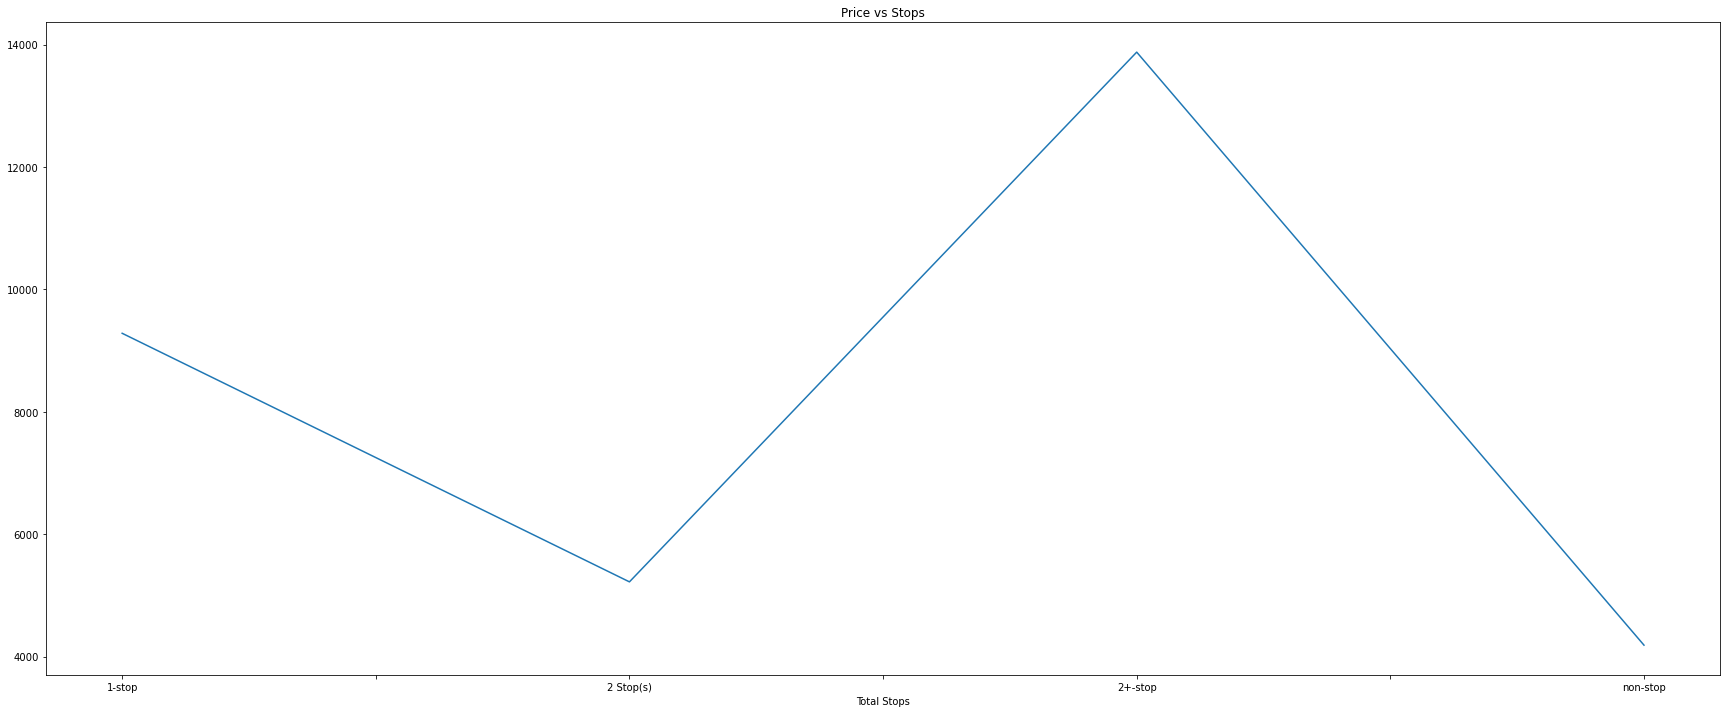

In [70]:
plt.figure(figsize=(30,12))
df.groupby(['Total Stops'])['Price'].mean().plot()
plt.title('Price vs Stops')

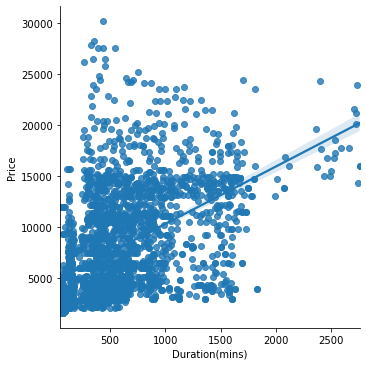

In [71]:
#It can be observed that Number of Stops impact the Air Ticket Pricing of Airlines

sns.lmplot(x="Duration(mins)", y="Price", data=df)

<AxesSubplot:xlabel='To', ylabel='Price'>

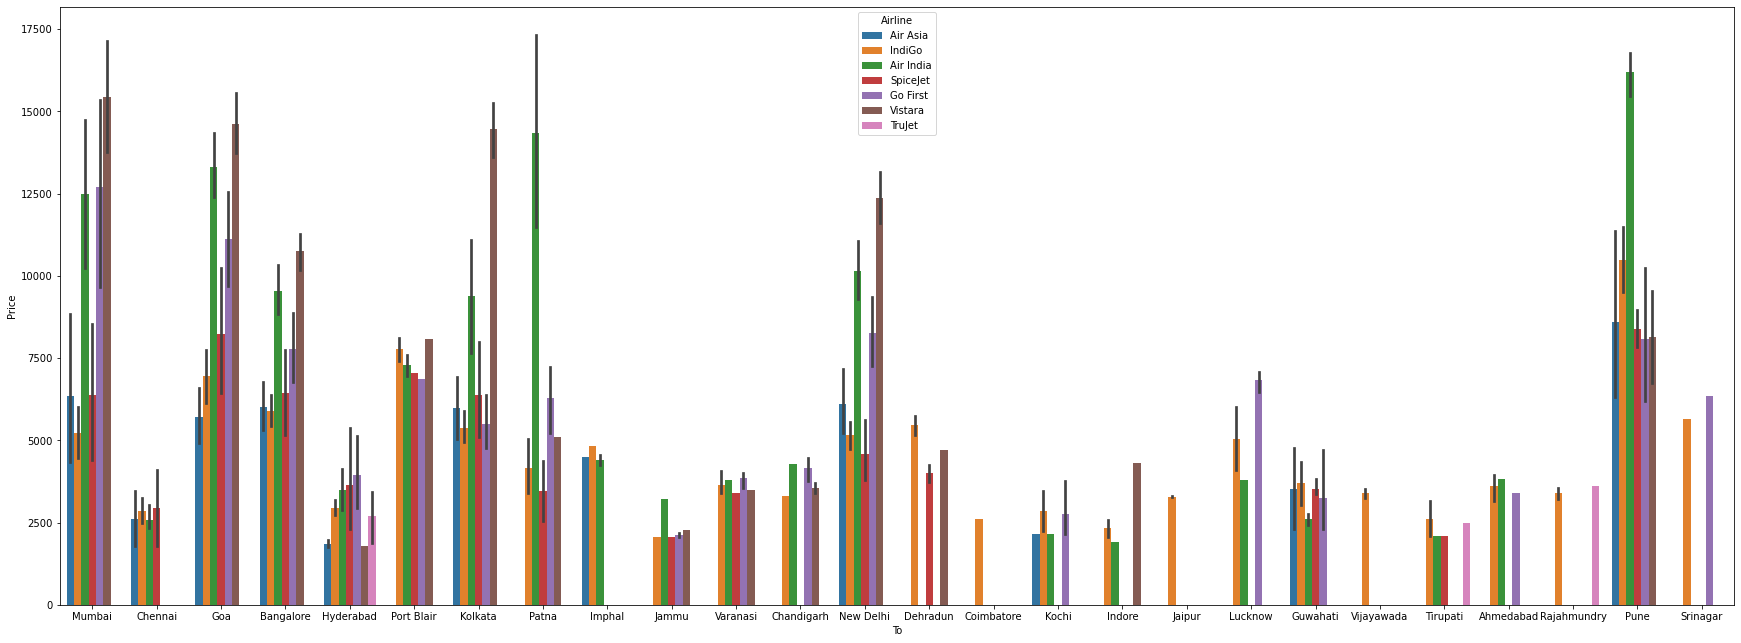

In [75]:
#There is a linear relationship between Price and flight duration.

plt.figure(figsize=(30,11),facecolor='white')
sns.barplot(df['To'],df['Price'],hue=df['Airline'])

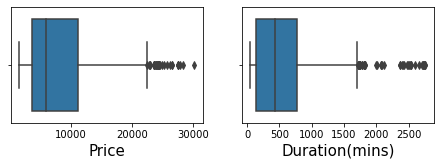

In [77]:
#Checking for Outliers in continuous data type Features.

plt.figure(figsize=(20,20),facecolor='white')
plotnum=1
for col in df[['Price','Duration(mins)']]:
    if plotnum<=34:
        plt.subplot(8,5,plotnum)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

In [80]:
#Removing Outliers using Z score Method

df2 =df[['Duration(mins)']].copy() #making a copy of the continuous data type column.


In [82]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [83]:
df3.shape

(2559, 1)

In [84]:
df2.shape

(2585, 1)

In [85]:
#Data loss %:
loss=(2585-2559)/2585 * 100
loss

1.0058027079303675

In [87]:
#Using Z score method to reduce outliers since it has a low data loss %
dropindx = df.index.difference(df3.index)
dropindx

Int64Index([1840, 1917, 1918, 1984, 1987, 1988, 1989, 1990, 1991, 1992, 1994,
            1995, 1997, 1998, 1999, 2217, 2218, 2222, 2223, 2226, 2227, 2229,
            2234, 2368, 2388, 2390],
           dtype='int64')

In [89]:
df.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe

In [90]:
df.reset_index(drop=True,inplace = True) #resetting the index of the dataframe

In [91]:
df

,Airline,Flight Number,Date of Departure,From,To,Total Stops,Price,Duration(mins)
0,Air Asia,I5-764,"Tue, Feb 8",New Delhi,Mumbai,non-stop,2456,130
1,IndiGo,6E-2054,"Tue, Feb 8",New Delhi,Mumbai,non-stop,2456,130
2,IndiGo,6E-5001,"Tue, Feb 8",New Delhi,Mumbai,non-stop,2456,130
3,IndiGo,6E-2046,"Tue, Feb 8",New Delhi,Mumbai,non-stop,2456,130
4,IndiGo,6E-5328,"Tue, Feb 8",New Delhi,Mumbai,non-stop,2456,135
...,...,...,...,...,...,...,...,...
2554,Vistara,UK-613,Dec-07,Mumbai,Bangalore,2+-stop,15581,490
2555,Vistara,UK-653,Dec-07,Mumbai,Bangalore,1-stop,15603,735
2556,Air India,AI-675,Dec-07,Mumbai,Bangalore,1-stop,15498,1030
2557,Vistara,UK-651,Dec-07,Mumbai,Bangalore,1-stop,17283,1570


<AxesSubplot:xlabel='Duration(mins)'>

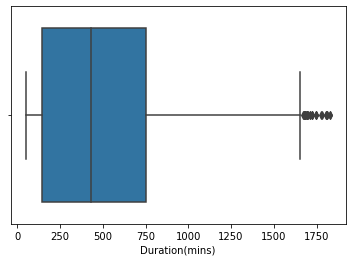

In [92]:
sns.boxplot(df['Duration(mins)'])

In [93]:
#Checking for skewness in data distributions

df['Duration(mins)'].skew()

1.0460341498757635

In [95]:
#Normalizing Data Distribution using PowerTransformer

from sklearn.preprocessing import PowerTransformer

In [96]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [98]:
df4 = df[['Duration(mins)']]

In [99]:
transformed= powtrans.fit_transform(df4)

In [100]:
type(transformed)

numpy.ndarray

In [101]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe

In [102]:
transformed.skew()

Duration(mins)   -0.042295
dtype: float64

In [103]:
transformed.index = df.index

In [104]:
df[['Duration(mins)']] = transformed[['Duration(mins)']]

In [105]:
df['Duration(mins)'].skew()

-0.042295196395144695

In [107]:
#Encoding Categorical Columns

#Encoding using get_dummies()

df

,Airline,Flight Number,Date of Departure,From,To,Total Stops,Price,Duration(mins)
0,Air Asia,I5-764,"Tue, Feb 8",New Delhi,Mumbai,non-stop,2456,-1.110073
1,IndiGo,6E-2054,"Tue, Feb 8",New Delhi,Mumbai,non-stop,2456,-1.110073
2,IndiGo,6E-5001,"Tue, Feb 8",New Delhi,Mumbai,non-stop,2456,-1.110073
3,IndiGo,6E-2046,"Tue, Feb 8",New Delhi,Mumbai,non-stop,2456,-1.110073
4,IndiGo,6E-5328,"Tue, Feb 8",New Delhi,Mumbai,non-stop,2456,-1.073606
...,...,...,...,...,...,...,...,...
2554,Vistara,UK-613,Dec-07,Mumbai,Bangalore,2+-stop,15581,0.280549
2555,Vistara,UK-653,Dec-07,Mumbai,Bangalore,1-stop,15603,0.752565
2556,Air India,AI-675,Dec-07,Mumbai,Bangalore,1-stop,15498,1.163452
2557,Vistara,UK-651,Dec-07,Mumbai,Bangalore,1-stop,17283,1.700784


In [111]:
#Encoding Columns 'From' and 'To' using Label Encoder

from sklearn.preprocessing import LabelEncoder

labenc = LabelEncoder()

for col in df[['From','To']]:
    df[col] = labenc.fit_transform(df[col])

    
df

,Airline,Flight Number,Date of Departure,From,To,Total Stops,Price,Duration(mins)
0,Air Asia,I5-764,"Tue, Feb 8",16,16,non-stop,2456,-1.110073
1,IndiGo,6E-2054,"Tue, Feb 8",16,16,non-stop,2456,-1.110073
2,IndiGo,6E-5001,"Tue, Feb 8",16,16,non-stop,2456,-1.110073
3,IndiGo,6E-2046,"Tue, Feb 8",16,16,non-stop,2456,-1.110073
4,IndiGo,6E-5328,"Tue, Feb 8",16,16,non-stop,2456,-1.073606
...,...,...,...,...,...,...,...,...
2554,Vistara,UK-613,Dec-07,15,1,2+-stop,15581,0.280549
2555,Vistara,UK-653,Dec-07,15,1,1-stop,15603,0.752565
2556,Air India,AI-675,Dec-07,15,1,1-stop,15498,1.163452
2557,Vistara,UK-651,Dec-07,15,1,1-stop,17283,1.700784


In [112]:
#Finding Correlation

f_corr =df.corr()

f_corr

,From,To,Price,Duration(mins)
From,1.000000,-0.154989,0.369458,0.170938
To,-0.154989,1.000000,0.014258,-0.040379
Price,0.369458,0.014258,1.000000,0.534898
Duration(mins),0.170938,-0.040379,0.534898,1.000000


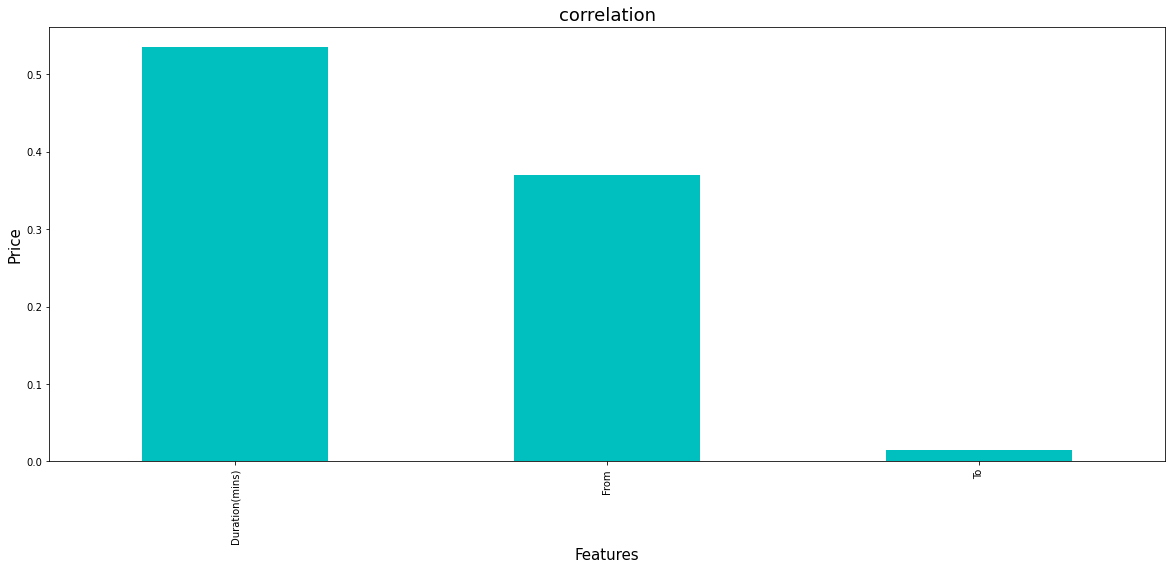

In [115]:
#Visualizing correlation of feature columns with label column.

plt.figure(figsize = (20,8))
df.corr()['Price'].sort_values(ascending = False).drop(['Price']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()